In [2]:
import numpy as np
from matplotlib import pyplot

In [3]:
from numpy import array

In [4]:
cases = np.array([1,2,3,4,5,6,7,8,9])
temp = np.array([30,31,30,31,32,32,34,35,32])

pred = np.array([cases[i]+temp[i] for i in range(len(cases))]) 

In [5]:
cases = np.reshape(cases, (len(cases),1))
temp = np.reshape(temp , (len(temp),1))
pred = np.reshape(pred,(len(pred),1))

In [6]:
print (pred)

[[31]
 [33]
 [33]
 [35]
 [37]
 [38]
 [41]
 [43]
 [41]]


In [7]:
data_final = np.hstack((cases,temp,pred))

In [8]:
data_final

array([[ 1, 30, 31],
       [ 2, 31, 33],
       [ 3, 30, 33],
       [ 4, 31, 35],
       [ 5, 32, 37],
       [ 6, 32, 38],
       [ 7, 34, 41],
       [ 8, 35, 43],
       [ 9, 32, 41]])

In [9]:
def split_data(series, n):
    
    X,y = list(),list()
    
    for i in range (len(series)):
        
        end = i+n
        
        if end > len(series): 
            break
        
        series_train = series[i:end, :-1]
        series_test = series[end-1, -1]
        
        X = np.append(X,series_train)
        y = np.append(y,series_test)
    
    return np.array(X),np.array(y)

In [10]:
X,y = split_data(data_final,3)
X = X.reshape(7,3,2)
print(X.shape, y.shape)


(7, 3, 2) (7,)


In [11]:
for i in range (len(X)):
    print(X[i],y[i])

[[ 1. 30.]
 [ 2. 31.]
 [ 3. 30.]] 33.0
[[ 2. 31.]
 [ 3. 30.]
 [ 4. 31.]] 35.0
[[ 3. 30.]
 [ 4. 31.]
 [ 5. 32.]] 37.0
[[ 4. 31.]
 [ 5. 32.]
 [ 6. 32.]] 38.0
[[ 5. 32.]
 [ 6. 32.]
 [ 7. 34.]] 41.0
[[ 6. 32.]
 [ 7. 34.]
 [ 8. 35.]] 43.0
[[ 7. 34.]
 [ 8. 35.]
 [ 9. 32.]] 41.0


In [12]:
y

array([33., 35., 37., 38., 41., 43., 41.])

In [13]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

Using TensorFlow backend.


In [14]:
import matplotlib.pyplot as plt


In [23]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (3,2)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')
model.fit(X,y,epochs = 200)

Epoch 1/200
7/7 [==============================] - 1s 105ms/step - loss: 1496.6262
Epoch 2/200
7/7 [==============================] - 0s 884us/step - loss: 1480.2955
Epoch 3/200
7/7 [==============================] - 0s 1ms/step - loss: 1458.3872
Epoch 4/200
7/7 [==============================] - 0s 1ms/step - loss: 1436.5757
Epoch 5/200
7/7 [==============================] - 0s 1ms/step - loss: 1414.8173
Epoch 6/200
7/7 [==============================] - 0s 1ms/step - loss: 1393.9924
Epoch 7/200
7/7 [==============================] - 0s 1ms/step - loss: 1372.3507
Epoch 8/200
7/7 [==============================] - 0s 1ms/step - loss: 1351.1528
Epoch 9/200
7/7 [==============================] - 0s 1ms/step - loss: 1329.3093
Epoch 10/200
7/7 [==============================] - 0s 1ms/step - loss: 1307.4226
Epoch 11/200
7/7 [==============================] - 0s 1ms/step - loss: 1285.0178
Epoch 12/200
7/7 [==============================] - 0s 1ms/step - loss: 1262.2258
Epoch 13/200
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 3.6657
Epoch 104/200
7/7 [==============================] - 0s 1ms/step - loss: 3.6569
Epoch 105/200
7/7 [==============================] - 0s 1ms/step - loss: 3.6556
Epoch 106/200
7/7 [==============================] - 0s 1ms/step - loss: 3.6575
Epoch 107/200
7/7 [==============================] - 0s 1ms/step - loss: 3.6588
Epoch 108/200
7/7 [==============================] - 0s 2ms/step - loss: 3.6567
Epoch 109/200
7/7 [==============================] - 0s 2ms/step - loss: 3.6493
Epoch 110/200
7/7 [==============================] - 0s 1ms/step - loss: 3.6357
Epoch 111/200
7/7 [==============================] - 0s 1ms/step - loss: 3.6160
Epoch 112/200
7/7 [==============================] - 0s 1ms/step - loss: 3.5911
Epoch 113/200
7/7 [==============================] - 0s 1ms/step - loss: 3.5621
Epoch 114/200
7/7 [==============================] - 0s 1ms/step - loss: 3.5307
Epoch 115/200
7/7 [==============================] - 0

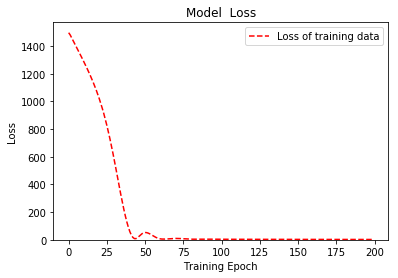

In [24]:
plt.figure(figsize=(6, 4))
#plt.plot(model.history['acc'], "g--", label="Accuracy of training data")
plt.plot(model.history.history['loss'], "r--", label="Loss of training data")
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [40]:
# probably overfitting
# Hence testing 
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, 3, 2))
yhat = model.predict(x_input)
print(yhat)

[[177.48293]]


In [29]:
modell = Sequential()
modell.add(LSTM(50, activation = 'relu', return_sequences=True,input_shape = (3,2)))
modell.add(LSTM(50, activation ='relu'))
modell.add(Dense(1))
modell.compile(optimizer = 'adam',loss = 'mse')
modell.summary()
modell.fit(X,y,epochs = 200)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 3, 50)             10600     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] - 1s 177ms/step - loss: 1513.4830
Epoch 2/200
7/7 [==============================] - 0s 1ms/step - loss: 1501.7231
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 1489.8530
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 1479.2030
Epoch 5/200
7/7 [==============================] - 0s 

Epoch 94/200
7/7 [==============================] - 0s 2ms/step - loss: 4.0106
Epoch 95/200
7/7 [==============================] - 0s 2ms/step - loss: 3.9962
Epoch 96/200
7/7 [==============================] - 0s 2ms/step - loss: 3.9500
Epoch 97/200
7/7 [==============================] - 0s 2ms/step - loss: 3.8761
Epoch 98/200
7/7 [==============================] - 0s 2ms/step - loss: 3.7839
Epoch 99/200
7/7 [==============================] - 0s 2ms/step - loss: 3.6854
Epoch 100/200
7/7 [==============================] - 0s 2ms/step - loss: 3.5917
Epoch 101/200
7/7 [==============================] - 0s 2ms/step - loss: 3.5110
Epoch 102/200
7/7 [==============================] - 0s 3ms/step - loss: 3.4479
Epoch 103/200
7/7 [==============================] - 0s 2ms/step - loss: 3.4014
Epoch 104/200
7/7 [==============================] - 0s 2ms/step - loss: 3.3672
Epoch 105/200
7/7 [==============================] - 0s 2ms/step - loss: 3.3376
Epoch 106/200
7/7 [===========================

Epoch 197/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 198/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 199/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 200/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0505


In [39]:
 
x_inputt = array([[80, 85], [90, 95], [100, 105]])
x_inputt = x_inputt.reshape((1, 3, 2))
yhatt = modell.predict(x_inputt)
print(yhatt)

[[172.51682]]
